# Data setup after analysis is saved to a csv file "df_with_no_outliers". I will be using this for further modeling and evaluation

<h3> Data Preprocessing, Scaling and  Splitting the Data </h3>

<h4> Standard Libraraies </h4>

In [5]:
import warnings

In [6]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score,roc_auc_score, recall_score, accuracy_score,f1_score,classification_report
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from collections import Counter

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import auc as skl_auc

from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.dummy import DummyClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

warnings.simplefilter(action='ignore', category=FutureWarning)
set_config("display")

In [9]:
data = pd.read_csv('data/df_with_no_outliers.csv')

In [10]:
data.head()

,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status,date,Carrier_Name_coder,Destination_coder,Source_coder
0,2003,1955,2225,335,150,8,810,0,2008-01-03,0.0,0.0,0.0
1,754,735,1000,3231,145,19,810,1,2008-01-03,0.0,0.0,0.0
2,628,620,750,448,90,8,515,0,2008-01-03,0.0,1.0,1.0
3,926,930,1100,1746,90,-4,515,0,2008-01-03,0.0,1.0,1.0
4,1940,1915,2110,378,115,25,688,1,2008-01-03,0.0,2.0,1.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867821 entries, 0 to 2867820
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Actual_Shipment_Time   int64  
 1   Planned_Shipment_Time  int64  
 2   Planned_Delivery_Time  int64  
 3   Carrier_Num            int64  
 4   Planned_TimeofTravel   int64  
 5   Shipment_Delay         int64  
 6   Distance               int64  
 7   Delivery_Status        int64  
 8   date                   object 
 9   Carrier_Name_coder     float64
 10  Destination_coder      float64
 11  Source_coder           float64
dtypes: float64(3), int64(8), object(1)
memory usage: 262.6+ MB


In [12]:
data = data.drop('date', axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867821 entries, 0 to 2867820
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Actual_Shipment_Time   int64  
 1   Planned_Shipment_Time  int64  
 2   Planned_Delivery_Time  int64  
 3   Carrier_Num            int64  
 4   Planned_TimeofTravel   int64  
 5   Shipment_Delay         int64  
 6   Distance               int64  
 7   Delivery_Status        int64  
 8   Carrier_Name_coder     float64
 9   Destination_coder      float64
 10  Source_coder           float64
dtypes: float64(3), int64(8)
memory usage: 240.7 MB


In [14]:
X = data.drop('Delivery_Status', axis=1)  # Using all features except the target
y = data['Delivery_Status']

In [15]:
data.Delivery_Status.value_counts()

Delivery_Status
0    2623700
1     244121
Name: count, dtype: int64

<h3> As you see above the target variable 'Delivery Status' is unbalanced and i need to fix this to impove the model performance.The initial round results are overfitting to the models with a 100% accuracy score and hence degrading the model perfomance. I have 2 approaches either to undersample or oversample the target variables using RamdomUnderSampler or SMOTE respectively. I am choosing undersampling to see how the results will perform if required will go for oversampling. </h3>

In [16]:
# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'majority')

In [17]:
# Balancing the data
X_resampled, y_X_resampled = rus.fit_resample(X, y)

In [18]:
Counter(y_X_resampled)

Counter({0: 244121, 1: 244121})

In [19]:
X_resampled.shape

(488242, 10)

In [20]:
X.shape

(2867821, 10)

In [21]:
# Creating oversampling just in case to use for future testing.
oversample = SMOTE()
X_smote,y_smote = oversample.fit_resample(X,y)
print(Counter(y_smote))

Counter({0: 2623700, 1: 2623700})


In [22]:
X_smote.shape

(5247400, 10)

<h4> Splitting the Data </h4>

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<h4> Standardization </h4>

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(scaler.mean_)
print('----------')
print(scaler.scale_)

[1.29352757e+03 1.29574886e+03 1.46539598e+03 2.29200662e+03
 1.16312228e+02 6.70543241e-01 6.23848742e+02 7.44365345e+00
 6.46407060e+01 6.96214091e+01]
----------
[ 466.40839306  462.23845971  474.64883421 1942.08830611   50.17986223
    8.63283824  393.70949781    5.94059686   52.42132537   51.68399016]


<h3> Building the Model </h3>

<h4> A Baseline Model </h4>

<h5> The baseline score for the classifier by using the DummyClassifier with the training data. Score estimator on the test set. 

Note: The DummyClassifier works just as all other estimators you have encountered and has a .fit and .score method. </h5>

In [31]:
dummy_clf = DummyClassifier().fit(X_train_scaled, y_train)
baseline_score = dummy_clf.score(X_test_scaled, y_test)

print(baseline_score)

0.9149278337861738


<h4> Considering 3 models with default parameters 
    
1. Logistic Regression
    
2. Decision Tree
    
3. KNN Neighbor
    
</h4>

In [32]:
#Logistic Regression: 
# Getting training score and testing for comparison
lr_pipe = Pipeline([('lr', LogisticRegression())])
lr_pipe.fit(X_train_scaled, y_train)
lr_pipe_acc_test = lr_pipe.score(X_test_scaled, y_test)
lr_pipe_acc_training = lr_pipe.score(X_train_scaled, y_train)

print(f'Train_Score: {lr_pipe_acc_training: .2f}\nTest_Score: {lr_pipe_acc_test: .2f}')

Train_Score:  1.00
Test_Score:  1.00


In [33]:
# Logistic Regression Perfomance Metrics
y_pred = lr_pipe.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    655963
           1       1.00      1.00      1.00     60993

    accuracy                           1.00    716956
   macro avg       1.00      1.00      1.00    716956
weighted avg       1.00      1.00      1.00    716956



<class 'numpy.ndarray'>


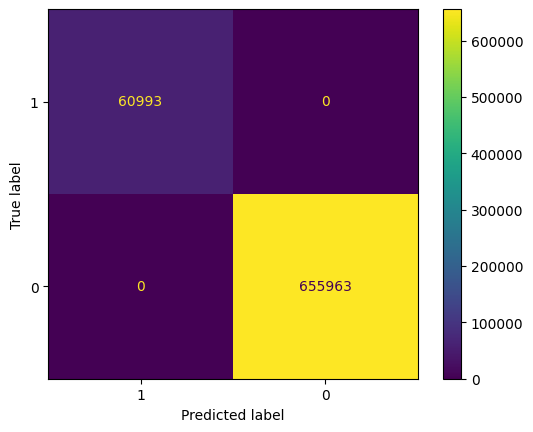

In [34]:
#Confusion Matrix 
confusion_mat = confusion_matrix(y_test, y_pred, labels = [1, 0])
dist = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['1', '0'])
dist.plot()

# Answer check
print(type(confusion_mat))

In [35]:
#Decision Tree
# Getting training score and testing for comparison
dtree_pipe = Pipeline([('dtree', DecisionTreeClassifier(random_state = 42))])
dtree_pipe.fit(X_train_scaled, y_train)
dtree_pipe_acc_test = dtree_pipe.score(X_test_scaled, y_test)
dtree_pipe_acc_training = dtree_pipe.score(X_train_scaled, y_train)

print(f'Train_Score: {dtree_pipe_acc_training: .2f}\nTest_Score: {dtree_pipe_acc_test: .2f}')

Train_Score:  1.00
Test_Score:  1.00


In [36]:
# Decision Tree Perfomance Metrics :
y_pred = dtree_pipe.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    655963
           1       1.00      1.00      1.00     60993

    accuracy                           1.00    716956
   macro avg       1.00      1.00      1.00    716956
weighted avg       1.00      1.00      1.00    716956



In [37]:
# KNN 
# Getting training score and testing for comparison
knn_pipe = Pipeline([('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train_scaled, y_train)
knn_pipe_acc_test = knn_pipe.score(X_test_scaled, y_test)
knn_pipe_acc_training = knn_pipe.score(X_train_scaled, y_train)

print(f'Train_Score: {knn_pipe_acc_training: .2f}\nTest_Score: {knn_pipe_acc_test: .2f}')

Train_Score:  1.00
Test_Score:  0.99


In [38]:
# KNN Neighbor Perfomance Metrics:
y_pred = knn_pipe.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9942018757078538
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    655963
           1       0.97      0.96      0.97     60993

    accuracy                           0.99    716956
   macro avg       0.98      0.98      0.98    716956
weighted avg       0.99      0.99      0.99    716956



<h3> Further Evaluation After first round of basic modelling </h3>

<h4>As you can see above the models are overfitting, I need to reconsider few steps perfomred :

1. Check for the outliers performed and try to balance it. (Undersample)
    
2. After outliers still the dataset is unbalanced , impove it by using SMOTE (add synthetic data).
    
3. Work with different features 
    .
4. Work with hyperparamaters for the above models.
    
5. Will try to use other models like Random Forest or XGBoost ans a Simple NeuralNetwork

</h4>

<h4> To improve model perfomance and reduce the overfitting i have undersampled the target variable and will be using the resampled data going foward </h4>

<h4>After testing the intial set of data with default parameters , next phase is to try with different hyperparameters for those models with the resampled data</h4>

<h3> Splitting the resampled data "X_resampled, y_X_resampled" </h3>

In [39]:
#X_resampled, y_X_resampled
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_X_resampled, test_size = 0.25, random_state = 42)

<h4> Standardization </h4>

In [40]:
scaler = StandardScaler()
X_train_scaled_resampled = scaler.fit_transform(X_train_resampled)
X_test_scaled_resampled = scaler.fit_transform(X_test_resampled)

print(scaler.mean_)
print('----------')
print(scaler.scale_)

[1384.53551093 1372.23511195 1540.50869647 2263.64933107  118.04848395
   10.40855802  638.30267653    7.36974955   63.9223503    68.90240945]
----------
[ 459.26432125  451.36277365  471.01394162 1920.2267867    50.64032622
   12.78901089  397.00831344    6.0380179    52.50777936   50.73710884]


<h3> KNN  </h3>

In [41]:
# KNN with Grid Search
knn_roc_grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 20, 2)}, scoring = 'roc_auc')
knn_roc_grid.fit(X_train_scaled_resampled, y_train_resampled)
knn_roc_grid_acc_test = knn_roc_grid.score(X_test_scaled_resampled,  y_test_resampled)
knn_roc_grid_acc_training = knn_roc_grid.score(X_train_scaled_resampled, y_train_resampled)

print(f'Train_Score: {knn_roc_grid_acc_training: .2f}\nTest_Score: {knn_roc_grid_acc_test: .2f}')
best_k = knn_roc_grid.best_params_['knn__n_neighbors']
print(best_k)
print(knn_roc_grid.cv_results_)

Train_Score:  1.00
Test_Score:  1.00
19
{'mean_fit_time': array([0.74861884, 0.73813925, 0.75200109, 0.78369932, 0.76857862,
       0.77283893, 0.85592208, 0.78421326, 0.75148373, 0.78870893]), 'std_fit_time': array([0.01674919, 0.01031121, 0.02618462, 0.0591106 , 0.03425735,
       0.06987119, 0.18351593, 0.03027535, 0.02612795, 0.03664297]), 'mean_score_time': array([ 2.1183898 ,  4.35988536,  6.12196927,  7.62522473,  8.86879888,
       10.01851501, 11.37678604, 12.03221312, 13.04213123, 13.86702743]), 'std_score_time': array([0.04464944, 0.07764325, 0.0648154 , 0.05841147, 0.10059314,
       0.05803253, 0.4824424 , 0.09783188, 0.27601674, 0.21747432]), 'param_knn__n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=999999), 'params': [{'knn__n_neighbors': 1}, {'knn__n_neighbors': 3}, {'knn__n_neighbors': 5}, {'knn__n_neighbors': 7}, {'knn__

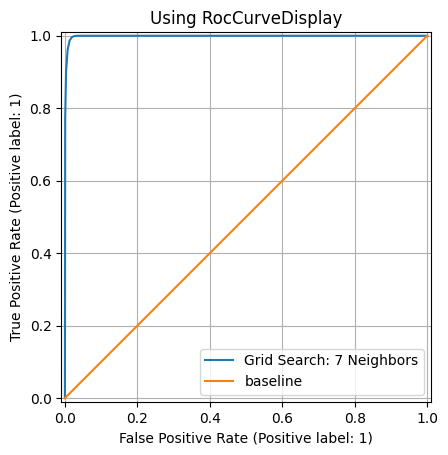

In [42]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(knn_roc_grid, X_test_scaled_resampled,  y_test_resampled, pos_label = 1, ax = ax, label = 'Grid Search: 7 Neighbors')
#RocCurveDisplay.from_estimator(knn_pipe_neighbors, X_test_scaled_improved,  y_test_improved, pos_label = 1, ax = ax, label = '10 Neighbors')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();
plt.savefig('images/roc_curve.png')

In [43]:
# KNN Neighbor Perfomance Metrics:
y_pred_resmapled = knn_roc_grid.predict(X_test_scaled_resampled)

# evaluate the model
report = classification_report(y_test_resampled, y_pred_resmapled)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     61084
           1       0.96      1.00      0.98     60977

    accuracy                           0.98    122061
   macro avg       0.98      0.98      0.98    122061
weighted avg       0.98      0.98      0.98    122061



<class 'numpy.ndarray'>


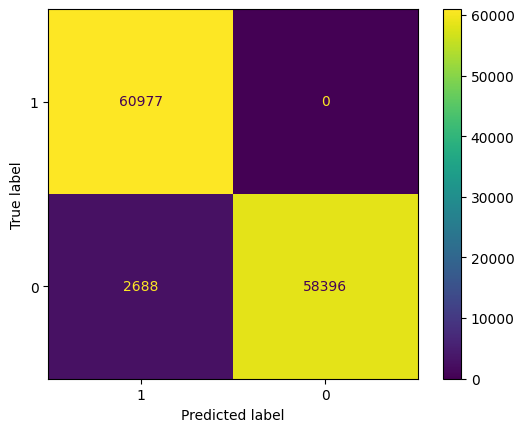

In [44]:
#Confusion Matrix 
confusion_mat_knn = confusion_matrix(y_test_resampled, y_pred_resmapled, labels = [1, 0])
dist = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_knn, display_labels=['1', '0'])
dist.plot()

# Answer check
print(type(confusion_mat))

<h4> After the above analysis on using KNN with GridsearchCV and hyperparameters with multiple neighbors below are the obsrevations : 

    1.Using 7 neighbors (1,4,7,10,13,16,19) the accuracy is reduced by 1% then default KNN model. ( from 99% to 98% accuracy). However accuracy is not the only parameter.
    2. So i have used the roc_auc score as a hyperparameter in GridsearchCV to understand the tradeoff between True positive rate vs False positive rate. This also did not give a good results and it is at a 100%.
    3. For better visiblity i have used the confusion matrix that can give us an understanding on TP, TN , FP and FN
    
</h4>

<h3> Logistic Regression  </h3>

<h4> The hyperparamerets selected below is the LASSO Reguarlization(L1) as the penality term with small C parameter of 0.1 to strengthen the regularization. I have also used saga as it is faster for large datasets when compared to liblinear which is default for binary classifiers along with a iteration of 1000 </h4>

In [45]:
#X_train_scaled_resampled, y_train_resampled
#X_test_scaled_resampled, y_test_resampled

In [46]:
#Logistic Regression with GridSearchCV and different hyperparameters
lr_pipe_params = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'saga', 
                                                                           max_iter = 1000, random_state = 42)
lr_pipe_params.fit(X_train_scaled_resampled, y_train_resampled)
lr_training_score = lr_pipe_params.score(X_train_scaled_resampled, y_train_resampled)
lr_test_score = lr_pipe_params.score(X_test_scaled_resampled,  y_test_resampled)
                    
print(f'Train_Score: {lr_training_score: .2f}\nTest_Score: {lr_test_score: .2f}')

Train_Score:  1.00
Test_Score:  1.00


In [47]:
# Logistic Regression Perfomance Metrics:
lr_predict_resampled = lr_pipe_params.predict(X_test_scaled_resampled)

# evaluate the model
report = classification_report(y_test_resampled, lr_predict_resampled)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61084
           1       1.00      1.00      1.00     60977

    accuracy                           1.00    122061
   macro avg       1.00      1.00      1.00    122061
weighted avg       1.00      1.00      1.00    122061



(0, 0, 1.0)

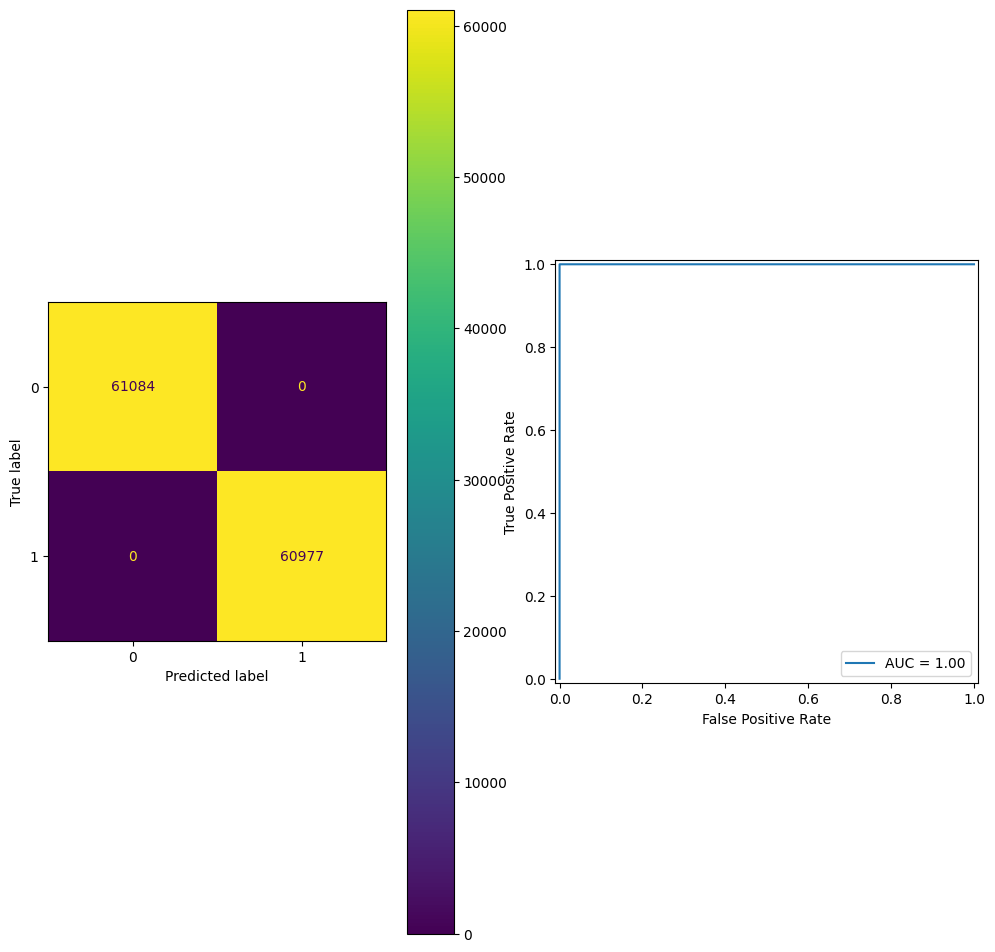

In [48]:
# ROC Curve with Confusion matrix 
from sklearn.metrics import auc as skl_auc

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix_lr = confusion_matrix( y_test_resampled, lr_predict_resampled)
disp1 = ConfusionMatrixDisplay(conf_matrix_lr)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = lr_pipe_params.predict_proba(X_test_scaled_resampled)[:, 1]
fpr, tpr, thresholds = roc_curve( y_test_resampled, y_score, pos_label=1)
roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_value)
disp2.plot(ax=ax[1])
plt.savefig('images/roc_curve1.png')

fp = conf_matrix_lr[0][1]
fn = conf_matrix_lr[1][0]
auc = round(roc_auc_value, 2)

fp, fn, auc

<h4> After attempting to use GridSearchCV for Logistic Regression above and compare it with previous run of logistic regression with deafult values , there is no diffeience in the scores along with its precision, recall and f1-score.</h4>

<h3> Decision Tree  </h3>

In [49]:
#X_train_scaled_resampled, y_train_resampled
#X_test_scaled_resampled, y_test_resampled

In [50]:
# Decision Tree with Hyperparametrs
params = {'max_depth': [1,5,8,10],
         'min_samples_split': [0.1, 3, 0.05],
          'criterion': ['gini','entropy'],
          'min_samples_leaf': [2,3,5,7],
          'ccp_alpha' : [0.1, 0.4, 0.6]
         }

In [51]:
dtree = DecisionTreeClassifier()

In [52]:
results = GridSearchCV(dtree, param_grid=params).fit(X_train_scaled_resampled, y_train_resampled)
best_score = results.best_score_
best_params = results.best_params_
grid_train_acc = results.score(X_train_scaled_resampled, y_train_resampled)
grid_test_acc = results.score(X_test_scaled_resampled, y_test_resampled)
print(f'Best score: {best_score}')
print(f'Best params: {best_params}')
print(f'Training Score: {grid_train_acc}')
print(f'Test Score: {grid_test_acc}')

C:\Users\pooja\anaconda3\envs\DeepLearning\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best score: 1.0
Best params: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 0.1}
Training Score: 1.0
Test Score: 1.0


In [53]:
# Decision Tree Perfomance Metrics:
dt_predict_resampled = results.predict(X_test_scaled_resampled)

# evaluate the model
report = classification_report(y_test_resampled, dt_predict_resampled)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61084
           1       1.00      1.00      1.00     60977

    accuracy                           1.00    122061
   macro avg       1.00      1.00      1.00    122061
weighted avg       1.00      1.00      1.00    122061



<h4> In the first round of Hyperparameters ran above i tried with different values for min_samples_leaf and min_samples_split however the results have no impact and accuracy score was at 100%. I tried to change the paramarters for min_samples_leaf and min_samples_split and added ccp_alpha for the next round of run still no impact on score and as observed above all the lowest values are considered as best score. 
    
    So i want to try Random forest and XGBoost to see if the model gets trained better rather than over fitting.

</h4>

<h3> Random Forest </h3>

<h4> My thought process to use Random Forest, becasue i have been using all the features for all the above models. Using Random forests, allows only a subset of features to be selected at random out of the total and the best split feature from the subset is used to split each node in a tree. This will help the model training faster rather than doing manual feature selection and analyzing the models.  </h4>

In [54]:
#X_train_scaled_resampled, y_train_resampled
#X_test_scaled_resampled, y_test_resampled

In [55]:
# Random Forest classifier
#To simulate RF using bagging, initializing the DT as
#dt = DecisionTreeClassifier(splitter='random')

rf_clf = RandomForestClassifier(n_estimators=100, max_features='log2')
rf_clf.fit(X_train_scaled_resampled, y_train_resampled)

rf_train_acc = rf_clf.score(X_train_scaled_resampled, y_train_resampled)
rf_test_acc = rf_clf.score(X_test_scaled_resampled, y_test_resampled)

print(f'Training Score: {rf_train_acc}')
print(f'Test Score: {rf_test_acc}')

Training Score: 1.0
Test Score: 1.0


In [56]:
# Random Forest Perfomance Metrics:
rf_predict_resampled = rf_clf.predict(X_test_scaled_resampled)

# evaluate the model
report_rf = classification_report(y_test_resampled, rf_predict_resampled)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61084
           1       1.00      1.00      1.00     60977

    accuracy                           1.00    122061
   macro avg       1.00      1.00      1.00    122061
weighted avg       1.00      1.00      1.00    122061



<h4> As you see above , i tried the first run with default values along with 100 estimators and in the next run just to compare changed the max_features to log2. No impact and the accuracy still stands at 100%. As we know that random forest is popular for reducing the variance in the dataset(overfitting) i also choose the bagging with random forest.</h4>

<h4> As part of my analysis when working with random forest i came accross an article that showed different classes available to handle the imbalanced dataset by sklearn and imblearn as follows : 
    
    1. Random Forest With Class Weighting - RandomForestClassifier(n_estimators=10, class_weight='balanced')
    
    2. Random Forest With Bootstrap Class Weighting - RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')
    
    3. Random Forest With Random Undersampling - BalancedRandomForestClassifier(n_estimators=10)
    
    4. Easy Ensemble - EasyEnsembleClassifier(n_estimators=10)

I wanted to mention this here, becasue i would want to try these in future and see if it can resolve the overfitting of the model.

</h4>

<h3> AdaBoost </h3>

In [57]:
#X_train_scaled_resampled, y_train_resampled
#X_test_scaled_resampled, y_test_resampled

In [58]:
#AdaBoost
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
)
ada_clf.fit(X_train_scaled_resampled, y_train_resampled)

ada_train_acc = ada_clf.score(X_train_scaled_resampled, y_train_resampled)
ada_test_acc = ada_clf.score(X_test_scaled_resampled, y_test_resampled)

print(f'Training Score: {ada_train_acc}')
print(f'Test Score: {ada_test_acc}')
#print("AdaBoost Classifier Accuracy:", ada_clf.score(X_train_scaled_resampled, y_train_resampled))

Training Score: 1.0
Test Score: 1.0


In [59]:
# Adaboost Perfomance Metrics:
ada_predict_resampled = ada_clf.predict(X_test_scaled_resampled)

# evaluate the model
report_ada = classification_report(y_test_resampled, ada_predict_resampled)

print("Classification Report:")
print(report_ada)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61084
           1       1.00      1.00      1.00     60977

    accuracy                           1.00    122061
   macro avg       1.00      1.00      1.00    122061
weighted avg       1.00      1.00      1.00    122061



<h4> Using AdaBoost for binary classification is very effective so , i wanted to check how the data will be trained with Ada Boost. Its good as it giving a 100% accuracy. Which is again a risk of overfitting. </h4>

<h3> To make better decision no the model selection for the deployment i attempted to run the strongest classifers(Random Forest, AdaBoost and XGBoost) on non sampled data that is using the X_train_scaled , y_train , X_test_scaled, y_test data as below </h3>

In [60]:
#X_test_scaled, y_test
#X_train_scaled, y_train

<h5> Random Forest for non sampled data</h5>

In [61]:
rf_clf_nonsample = RandomForestClassifier(n_estimators=200)
rf_clf_nonsample.fit(X_train_scaled, y_train)

rf_train_nonsample_acc = rf_clf_nonsample.score(X_train_scaled, y_train)
rf_test_nonsample_acc = rf_clf_nonsample.score(X_test_scaled, y_test)

print(f'Training Score: {rf_train_nonsample_acc}')
print(f'Test Score: {rf_test_nonsample_acc}')

Training Score: 1.0
Test Score: 1.0


<h5> AdaBoost for non sampled data</h5>

In [63]:
#AdaBoost
ada_clf_nonsample = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
)
ada_clf_nonsample.fit(X_train_scaled, y_train)

ada_train_acc_nonsample = ada_clf.score(X_train_scaled, y_train)
ada_test_acc_nonsample = ada_clf.score(X_test_scaled, y_test)

print(f'Training Score: {ada_train_acc_nonsample}')
print(f'Test Score: {ada_test_acc_nonsample}')
#print("AdaBoost Classifier Accuracy:", ada_clf.score(X_train_scaled_resampled, y_train_resampled))

Training Score: 0.8634344786864819
Test Score: 0.8639791005305765


In [64]:
#predictions
ada_predict = ada_clf.predict(X_test_scaled)

<class 'numpy.ndarray'>


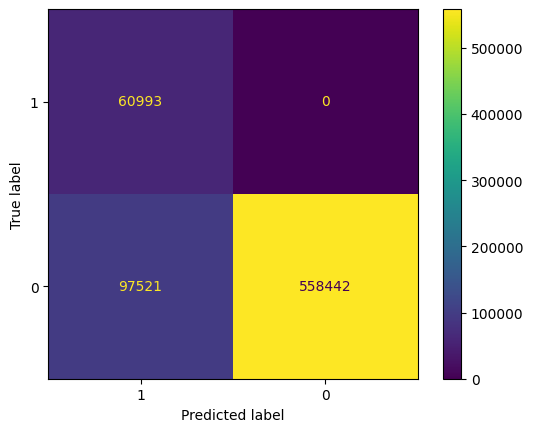

In [65]:
# Confustion Matrix to observe the TP,TN,FP and FN
confusion_mat_ada = confusion_matrix(y_test, ada_predict, labels = [1, 0])
dist = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_ada, display_labels=['1', '0'])
dist.plot()

# Answer check
print(type(confusion_mat_ada))

<h5> XGBoost for non sampled data</h5> 

<h5> As XGBoost uses optimized distributed gradient boosting techinque, i wanted to check how efficient it can be in prediction this dataset. No doubt it is fast and accurate with a 100% accuracy  </h5>

In [66]:
# XGBoost classifier
xgb_clf_nonsample = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf_nonsample.fit(X_train_scaled, y_train)

xgb_clf_train_acc_nonsample = xgb_clf_nonsample.score(X_train_scaled, y_train)
xgb_clf_test_acc_nonsample = xgb_clf_nonsample.score(X_test_scaled, y_test)

print(f'Training Score: {xgb_clf_train_acc_nonsample}')
print(f'Test Score: {xgb_clf_test_acc_nonsample}')

C:\Users\pooja\anaconda3\envs\DeepLearning\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:49:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Score: 1.0
Test Score: 1.0


<h4> As you see above , the non sampled data also gave 100% accuracy except for Adaboost which is at a 86% accuracy . This will help me take decision on using Adaboost as my final model becasue it can handle the variation in the data and give better model predictions </h4> 

<h3> Simple Neural networks for Binary classification model </h3>

<h4>  

        I will be using nonsampled data for this test. 

</h4>

In [67]:
#X_test_scaled, y_test
#X_train_scaled, y_train

In [19]:
tf.random.set_seed(42)
neural_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="softmax")
])

tf.random.set_seed(42)
neural_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

np.random.seed(20)
history = neural_model.fit(x = X_train_scaled,
                    y = y_train,
                    epochs=20,
                    batch_size=8)

Epoch 1/20
268859/268859 [==============================] - 1309s 5ms/step - loss: 0.0084 - accuracy: 0.0851
Epoch 2/20
268859/268859 [==============================] - 1355s 5ms/step - loss: 0.0013 - accuracy: 0.0851
Epoch 3/20
268859/268859 [==============================] - 1366s 5ms/step - loss: 3.1352e-04 - accuracy: 0.0851
Epoch 4/20
158598/268859 [================>.............] - ETA: 9:53 - loss: 1.6931e-04 - accuracy: 0.0850

KeyboardInterrupt: 

<h3> The above error is becasue i interuppted the kernel while running. Since the run was going to take more than 5 hours with an estimation of 20 minutes per epoch. I have attempted another run with just 5 epochs for unndersampled data for fasters results as below </h3>

<h4>  

        Another Neural Networks run where, I will be using undersampled data for this test. 

</h4>

In [68]:
#X_train_scaled_resampled, y_train_resampled
#X_test_scaled_resampled, y_test_resampled

In [27]:
tf.random.set_seed(42)
neural_model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="softmax")
])

tf.random.set_seed(42)
neural_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

np.random.seed(20)
history = neural_model.fit(x = X_train_scaled_resampled,
                    y = y_train_resampled,
                    epochs=5,
                    batch_size=8)

Epoch 1/5
45773/45773 [==============================] - 73s 2ms/step - loss: 0.0092 - accuracy: 0.5001
Epoch 2/5
45773/45773 [==============================] - 73s 2ms/step - loss: 4.0825e-04 - accuracy: 0.5001
Epoch 3/5
45773/45773 [==============================] - 73s 2ms/step - loss: 1.8070e-04 - accuracy: 0.5001
Epoch 4/5
45773/45773 [==============================] - 73s 2ms/step - loss: 1.0887e-04 - accuracy: 0.5001
Epoch 5/5
45773/45773 [==============================] - 73s 2ms/step - loss: 8.4051e-05 - accuracy: 0.5001


In [29]:
# Model evaluation
tf.random.set_seed(42)
model_evaluation = neural_model.evaluate(X_train_scaled_resampled, y_train_resampled)
model_loss = model_evaluation[0]
model_acc = model_evaluation[1]

print(f'Loss: {model_loss}')
print(f'Accuracy: {model_acc}')

11444/11444 [==============================] - 15s 1ms/step - loss: 1.1454e-04 - accuracy: 0.5001
Loss: 0.00011453902698121965
Accuracy: 0.5001460909843445


<h3> Using Neural networks on the undersampled data gave an accuracy of 50%. This is an eye opener how the neural networks is powerful. The research on how to impove this neural network to get a better accuracy will be my <b>future recommendation</b> for this project. </h3>

<h3> Feature Importance for AdaBoost </h3>

In [69]:
#feature importance evaluation :
r1 = permutation_importance(ada_clf_nonsample, X_test_scaled, y_test, random_state = 42)
r1.importances_mean

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15568654, 0.        , 0.        , 0.        , 0.        ])

In [71]:
for i in zip(X.columns, r1.importances_mean):
    print(i)

('Actual_Shipment_Time', 0.0)
('Planned_Shipment_Time', 0.0)
('Planned_Delivery_Time', 0.0)
('Carrier_Num', 0.0)
('Planned_TimeofTravel', 0.0)
('Shipment_Delay', 0.155686541433505)
('Distance', 0.0)
('Carrier_Name_coder', 0.0)
('Destination_coder', 0.0)
('Source_coder', 0.0)


<h3> Future Recommendations </h3>

| Feature | <center> Recommendation </center> | Coefficient Value | Impact | Interpretation 
| :- | -: | -: | -: | :-: |
| Actual_Shipment_Time | <center> No specific recommendation needed based on this feature. </center>  | 0.0 | None | Does not contribe in predicting the delivery of package on time |
| Planned_Shipment_Time | <center> No specific recommendation needed based on this feature. </center> | 0.0 | None | Does not contribe in predicting the delivery of package on time |
| Planned_Delivery_Time | <center> No specific recommendation needed based on this feature. </center> | 0.0 | None | Does not contribe in predicting the delivery of package on time |
| Carrier_Num | <center> No specific recommendation needed based on this feature. </center> | 0.0 | None | Does not contribe in predicting the delivery of package on time |
| Planned_TimeofTravel | <center> No specific recommendation needed based on this feature. </center> | 0.0 | None | Does not contribe in predicting the delivery of package on time |
| Shipment_Delay | <center>  Recommendation is reducing the shipment delaytime will impove the pacakge delivery </center> | 0.1556 | Significant Positive | This feature is important for a pacakge delivery becasue if a package is delayed chances are package will be lost or delayed. |
| Distance | <center> No specific recommendation needed based on this feature. </center> | 0.0 | None | Does not contribe in predicting the delivery of package on time |
| Carrier_Name_coder | <center> No specific recommendation needed based on this feature. </center>| 0.0 | None | Does not contribe in predicting the delivery of package on time|
| Destination_coder | <center> No specific recommendation needed based on this feature. </center> | 0.0 | None | Does not contribe in predicting the delivery of package on time |
| Source_coder | <center> No specific recommendation needed based on this feature. </center> | 0.0 | None | Does not contribe in predicting the delivery of package on time |

<h5>Shipment Delay feature is also the highly correlated feature as observed in the EDA </h5>

<h3> Concluding on the model for deployment </h3>

<h3> Based on the above results the best model i will be go forward for the deployment is Adaboost on the non-sampled data which has an accuracy of 86%. Next steps are to convert this notebook to a pickle file to save the model and used it to load in any other environment. </h3>

<h4> The deployment process involves several steps, from planning and model development to optimization, containerization, and continuous monitoring and maintenance. By focusing on important aspects like data storage, choosing appropriate frameworks, collecting feedback, and automating deployment and testing, teams can streamline the deployment process. <b> My next step will be to create an app via Streamlit for a UI effect and get the model predictions available for any user. </b> <h4>